In [10]:
#IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# DATA PREPERATION

In [11]:
#LOADING THE DATA & READING IT
Loan_df=pd.read_csv("XYZCorp_LendingData.txt", header=0, index_col=None, sep=" ", delimiter="\t")

In [12]:
Loan_df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade                 emp_title emp_length  \
0     10.65       162.87     B        B2                       NaN  10+ years   
1     15.27        59.83     C        C4                     Ryder   < 1 year   
2     15.96        84.33     C        C5                       NaN  10+ years   
3     13.49       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4     12.69        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status   issue_d pymnt_plan  \
0           RENT     24000.0            Verified  Dec-2011          n   
1           RENT     30000.0     Source Verified  Dec-2011          n   
2           RENT     12252.0        Not Verified  Dec-2011          n   
3           RENT     49200.0     Source Verified  Dec-2011          n   
4           RENT     80000.0     Source Verified  Dec-2011          n   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti  delinq_2yrs  \
0              Computer    860xx         AZ  27.65          0.0   
1                  bike    309xx         GA   1.00          0.0   
2  real estate business    606xx         IL   8.72          0.0   
3              personel    917xx         CA  20.00          0.0   
4              Personal    972xx         OR  17.94          0.0   

  earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0         Jan-1985             1.0                     NaN   
1         Apr-1999             5.0                     NaN   
2         Nov-2001             2.0                     NaN   
3         Feb-1996             1.0                    35.0   
4         Jan-1996             0.0                    38.0   

   mths_since_last_record  open_acc  pub_rec  revol_bal  revol_util  \
0                     NaN       3.0      0.0    13648.0        83.7   
1                     NaN       3.0      0.0     1687.0         9.4   
2                     NaN       2.0      0.0     2956.0        98.5   
3                     NaN      10.0      0.0     5598.0        21.0   
4                     NaN      15.0      0.0    27783.0        53.9   

   total_acc initial_list_status  out_prncp  out_prncp_inv   total_pymnt  \
0        9.0                   f        0.0            0.0   5861.071414   
1        4.0                   f        0.0            0.0   1008.710000   
2       10.0                   f        0.0            0.0   3003.653644   
3       37.0                   f        0.0            0.0  12226.302212   
4       38.0                   f      766.9          766.9   3242.170000   

   total_pymnt_inv  total_rec_prncp  total_rec_int  total_rec_late_fee  \
0          5831.78          5000.00         861.07                0.00   
1          1008.71           456.46         435.17                0.00   
2          3003.65          2400.00         603.65                0.00   
3         12226.30         10000.00        2209.33               16.97   
4          3242.17          2233.10        1009.07                0.00   

   recoveries  collection_recovery_fee last_pymnt_d  last_pymnt_amnt  \
0  

In [13]:
Loan_df.shape

(855969, 73)

In [14]:
#UNDERSTANDING THE NUMERIC DATA
Loan_df.describe(include='all')

id     member_id      loan_amnt    funded_amnt  \
count   8.559690e+05  8.559690e+05  855969.000000  855969.000000   
unique           NaN           NaN            NaN            NaN   
top              NaN           NaN            NaN            NaN   
freq             NaN           NaN            NaN            NaN   
mean    3.224073e+07  3.476269e+07   14745.571335   14732.378305   
std     2.271969e+07  2.399418e+07    8425.340005    8419.471653   
min     5.473400e+04  7.069900e+04     500.000000     500.000000   
25%     9.067986e+06  1.079273e+07    8000.000000    8000.000000   
50%     3.431355e+07  3.697532e+07   13000.000000   13000.000000   
75%     5.446311e+07  5.803559e+07   20000.000000   20000.000000   
max     6.861687e+07  7.351969e+07   35000.000000   35000.000000   

        funded_amnt_inv        term       int_rate    installment   grade  \
count     855969.000000      855969  855969.000000  855969.000000  855969   
unique              NaN           2            NaN            NaN       7   
top                 NaN   36 months            NaN            NaN       B   
freq                NaN      600221            NaN            NaN  247998   
mean       14700.061226         NaN      13.192320     436.238072     NaN   
std         8425.805478         NaN       4.368365     243.726876     NaN   
min            0.000000         NaN       5.320000      15.690000     NaN   
25%         8000.000000         NaN       9.990000     260.550000     NaN   
50%        13000.000000         NaN      12.990000     382.550000     NaN   
75%        20000.000000         NaN      15.990000     571.560000     NaN   
max        35000.000000         NaN      28.990000    1445.460000     NaN   

       sub_grade emp_title emp_length home_ownership    annual_inc  \
count     855969    806526     812908         855969  8.559690e+05   
unique        35    290912         11              6           NaN   
top           B3   Teacher  10+ years       MORTGAGE           NaN   
freq       54958     12965     282090         429106           NaN   
mean         NaN       NaN        NaN            NaN  7.507119e+04   
std          NaN       NaN        NaN            NaN  6.426447e+04   
min          NaN       NaN        NaN            NaN  0.000000e+00   
25%          NaN       NaN        NaN            NaN  4.500000e+04   
50%          NaN       NaN        NaN            NaN  6.500000e+04   
75%          NaN       NaN        NaN            NaN  9.000000e+04   
max          NaN       NaN        NaN            NaN  9.500000e+06   

       verification_status   issue_d pymnt_plan    desc             purpose  \
count               855969    855969     855969  121812              855969   
unique                   3       103          2  120335                  14   
top        Source Verified  Oct-2015          n          debt_consolidation   
freq                318178     48212     855964     231              505392   
mean                   NaN       NaN        NaN     NaN                 NaN   
std                    NaN       NaN        NaN     NaN                 NaN   
min                    NaN       NaN        NaN     NaN                 NaN   
25%                    NaN       NaN        NaN     NaN                 NaN   
50%                    NaN       NaN        NaN     NaN                 NaN   
75%                    NaN       NaN        NaN     NaN                 NaN   
max                    NaN       NaN        NaN     NaN                 NaN   

                     title zip_code addr_state            dti    delinq_2yrs  \
count               855936   855969     855969  855969.000000  855969.000000   
unique               60991      931         51            NaN            NaN   
top     Debt consolidation    945xx         CA            NaN            NaN   
freq                398089     9466     125172            NaN            NaN   
mean                   NaN      NaN        NaN      18.122165       0.311621   
std   

# DATA PRE-PROCESSING

In [15]:
#CREATING A COPY OF THE DATASET
df=pd.DataFrame.copy(Loan_df)
df.shape


(855969, 73)

In [16]:
#FEATURE SELECTION
'''ELIMINATING THE IRRELEVANT VARIABLES FROM THE DATASET BASED ON DOMAIN KNOWLEDGE'''
df=df.drop(["id","member_id","desc","zip_code","addr_state","earliest_cr_line"], axis=1)
df.shape

(855969, 67)

In [17]:
'''
6 VARIABLES HAVE BEEN ELIMINATED FROM THE DATASET
id, member_id-->random nos assigned, doesn't contribute for analysis.
desc-->description of loan, doesn't contribute for analysis.
earliest_cr_line-->the month from which the customer was allowed to take credits, doesn't contribute for analysis.

'''

"\n6 VARIABLES HAVE BEEN ELIMINATED FROM THE DATASET\nid, member_id-->random nos assigned, doesn't contribute for analysis.\ndesc-->description of loan, doesn't contribute for analysis.\nearliest_cr_line-->the month from which the customer was allowed to take credits, doesn't contribute for analysis.\n\n"

In [18]:
#HANDLING THE MISSING VALUES
df.isnull().sum()

loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       49443
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
pymnt_plan                          0
purpose                             0
title                              33
dti                                 0
delinq_2yrs                         0
inq_last_6mths                      0
mths_since_last_delinq         439812
mths_since_last_record         724785
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc   

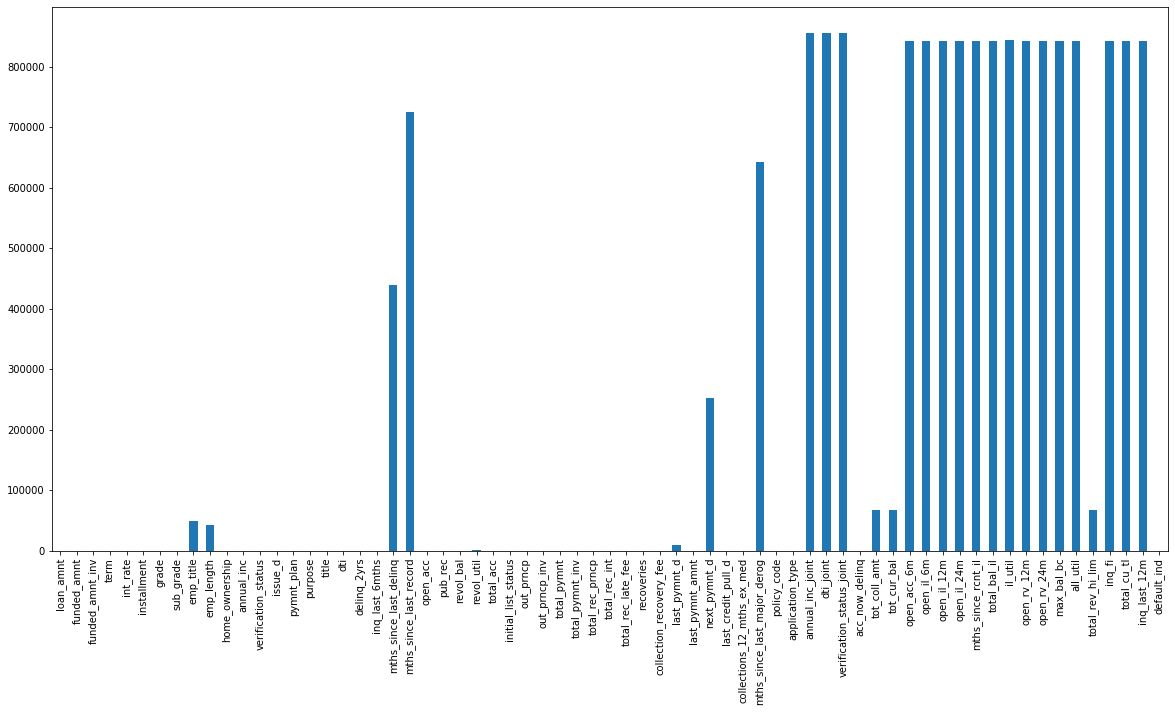

In [19]:
#PLOTTING A GRAPH TO SEE THE MISSING VALUES IN THE DATA
cols = df.isnull().sum()
plt.figure(figsize=(20,10))
cols.plot(kind='bar')
plt.show()

In [20]:
#ELIMINATING THE VARIABLES THAT HAVE MORE THAN 50% NA'S
null_cols=[]
for x in df.columns:
    if df[x].isnull().sum()>=0.5*len(df):
        null_cols.append(x)
print(null_cols)

['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']


In [21]:
print(len(null_cols))

20


In [22]:
'''
20 VARIABLES CONTAIN MORE THAT 50% NA'S & IS THUS ELIMINATED FROM THE DATASET.
'''

"\n20 VARIABLES CONTAIN MORE THAT 50% NA'S & IS THUS ELIMINATED FROM THE DATASET.\n"

In [23]:
df=df.drop(columns=null_cols,axis=1)
df.shape

(855969, 47)

In [24]:
#TREATING THE NULL VALUES OF SOME COLUMNS WITH MEDIAN BASED ON DOMAIN KNOWLEGDE

df['tot_coll_amt'].fillna(df['tot_coll_amt'].median(),inplace=True)
df['tot_cur_bal'].fillna(df['tot_cur_bal'].median(),inplace=True)
df['total_rev_hi_lim'].fillna(df['total_rev_hi_lim'].median(),inplace=True)

In [25]:
df['collections_12_mths_ex_med'].fillna(df['collections_12_mths_ex_med'].median(),inplace=True)

In [26]:
df["revol_util"].fillna(df["revol_util"].median(), inplace=True)

In [27]:
df["purpose"].value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [28]:
df["title"].value_counts()

Debt consolidation                                                                  398089
Credit card refinancing                                                             159228
Home improvement                                                                     38633
Other                                                                                30522
Debt Consolidation                                                                   15469
Major purchase                                                                       11519
Medical expenses                                                                      6408
Business                                                                              6325
Car financing                                                                         5372
Consolidation                                                                         5266
debt consolidation                                                                    4718

In [29]:
df=df.drop(["emp_title","title","next_pymnt_d"],axis=1)
df.shape

(855969, 44)

In [30]:
'''
3 VARIABLES HAVE BEEN ELIMINATED.
emp_title-->job title of the customer, not useful for analysis.
title-->purpose & title almost contain same data,
causing redundancy to the dataset thus title will be elminated since it contains NA's.
next_pymnt_d-->is a date variable, can't be imputed.
'''

"\n3 VARIABLES HAVE BEEN ELIMINATED.\nemp_title-->job title of the customer, not useful for analysis.\ntitle-->purpose & title almost contain same data,\ncausing redundancy to the dataset thus title will be elminated since it contains NA's.\nnext_pymnt_d-->is a date variable, can't be imputed.\n"

In [31]:
df["emp_length"].value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

In [32]:
'''MAPPING THE EMP_LENGTH INTO NUMERIC VALUES'''
#Creating a dictionary for emp_length
emp_dict={"< 1 year":0,"1 year":1,"2 years":2,"3 years":3,"4 years":4,"5 years":5,
         "6 years":6,"7 years":7,"8 years":8,"9 years":9,"10+ years":10}
#Mapping the values into emp_length
df["emp_length"]=df["emp_length"].map(emp_dict)
df["emp_length"].value_counts()

10.0    282090
2.0      75986
0.0      67597
3.0      67392
1.0      54855
5.0      53812
4.0      50643
7.0      43204
8.0      42421
6.0      41446
9.0      33462
Name: emp_length, dtype: int64

In [33]:
'''HERE THE NA'S OF EMP_LENGTH CAN BE IMPUTED AS <1 YEAR, SINCE IT CAN MEAN SELF EMPLOYED.'''
#Imputing the NA's in emp_length as 0
df["emp_length"].fillna(0,inplace=True)

In [34]:
'''ELIMINATING THE DATE VARIABLES SINCE THEY CAN'T BE IMPUTED'''
df=df.drop(["last_pymnt_d","last_credit_pull_d"],axis=1)
df.shape

(855969, 42)

In [35]:
df.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveri

In [36]:
'''ALL THE NA'S HAVE BEEN TREATED'''

"ALL THE NA'S HAVE BEEN TREATED"

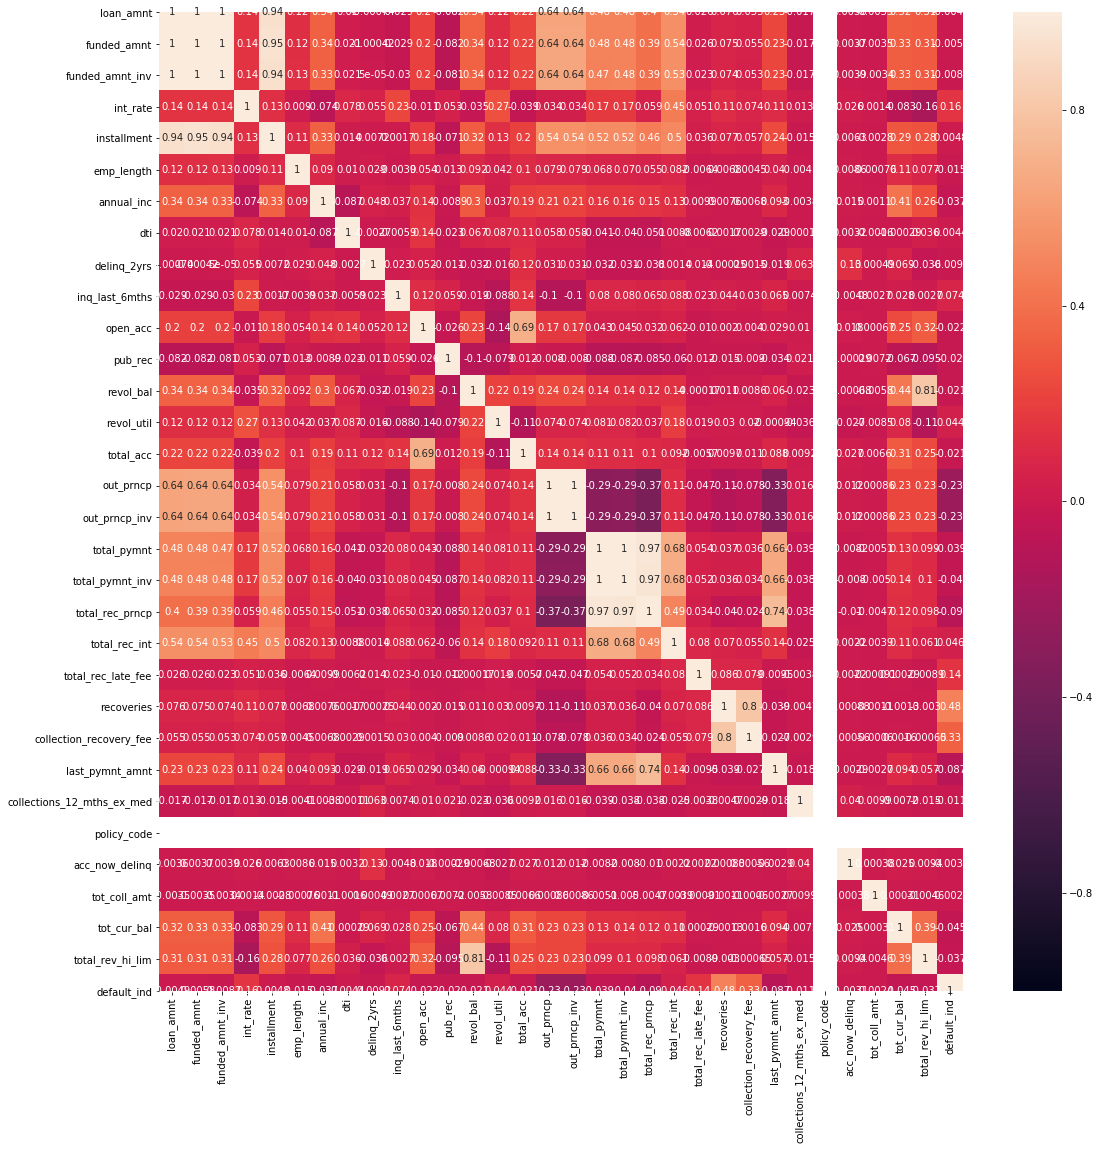

In [37]:
#CHECKING THE COR-RELATION OF THE WHOLE DATA
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),vmax=1.0, vmin=-1.0,annot=True)
plt.show()

In [38]:
df["policy_code"].value_counts()

1.0    855969
Name: policy_code, dtype: int64

In [39]:
'''ELIMINATING THE HIGHLY COR-RELATED VARIABLES & SOME UNWANTED VARIABLES SINCE THE CAUSE REDUNDANCY'''
df=df.drop(["policy_code","sub_grade","funded_amnt","collection_recovery_fee","inq_last_6mths","application_type"], axis=1)
#df=df.drop([""],axis=1)
df.shape

(855969, 36)

In [40]:
'''

6 VARIABLES HAVE BEEN ELIMINATED.
inq_last_6mths-->doesn't conttribute 
application_type-->doesn't conttribute 
grade & sub_grade have same values so keeping only grade.
policy_code-->has a single value, doesn't contribute to the analysis.
recoveries & collection_recovery_fee almost have same values so keeping only recoveries
'''

"\n\n6 VARIABLES HAVE BEEN ELIMINATED.\ninq_last_6mths-->doesn't conttribute \napplication_type-->doesn't conttribute \ngrade & sub_grade have same values so keeping only grade.\npolicy_code-->has a single value, doesn't contribute to the analysis.\nrecoveries & collection_recovery_fee almost have same values so keeping only recoveries\n"

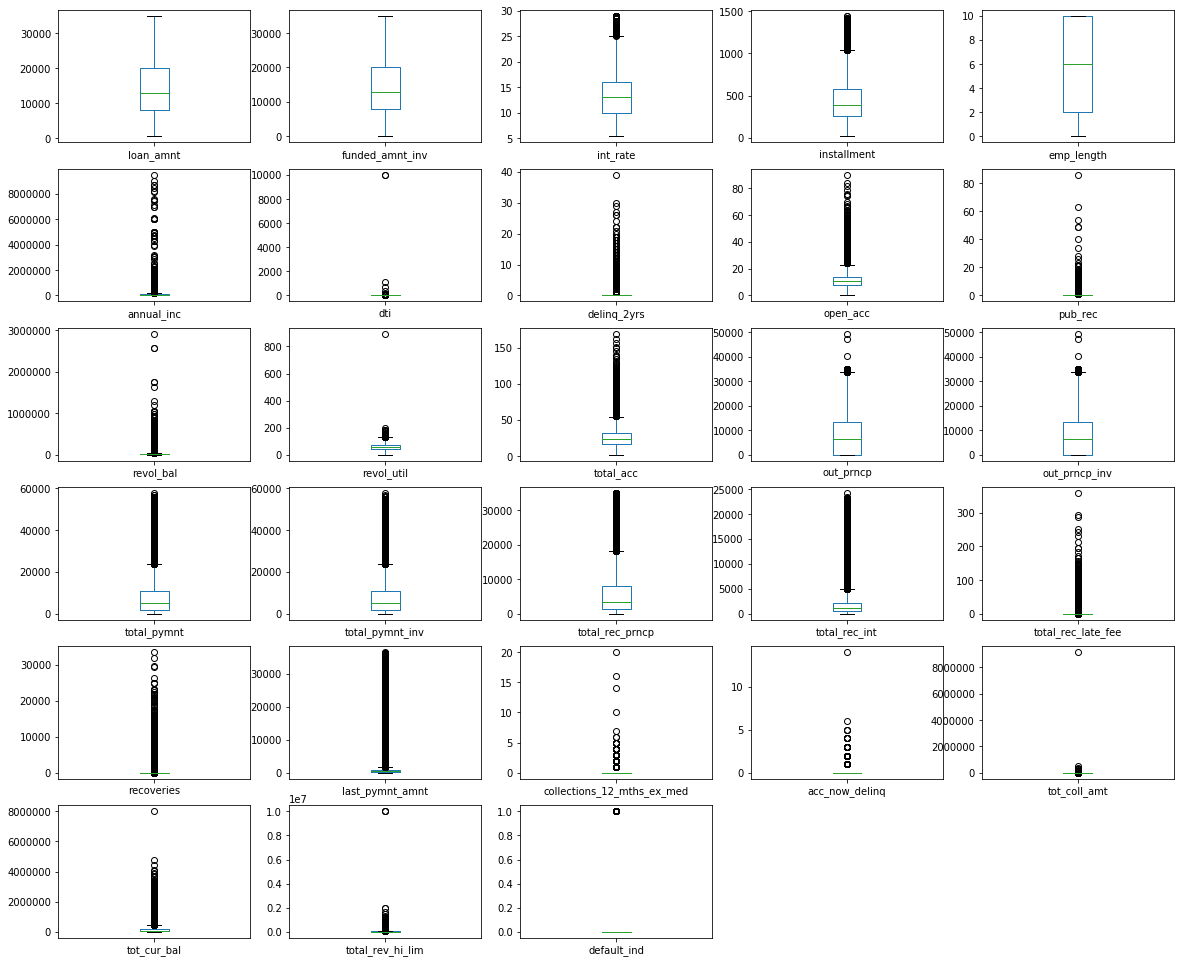

In [41]:
#TREATING OUTLIERS
df.plot(kind='box', subplots=True, layout=(7,5), sharex=False, sharey=False, figsize=(20,20) )
plt.show()

In [42]:
#COVERTING THE DATE VARIABLE
df['issue_d'] = pd.to_datetime(df['issue_d'])

In [43]:
#CONVERTING CATEGORICAL VARIABLES TO NUMERIC
#collecting the categorical variables to perform transformation
char_vars=[]
for x in df.columns:
    if df[x].dtype=="object":
        char_vars.append(x)
print(char_vars)

['term', 'grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'initial_list_status']


In [44]:
#converting the categorical variables into numeric variables using LabelEncoder()
from sklearn import preprocessing
#create an object
le=preprocessing.LabelEncoder()
for x in char_vars:
    df[x]=le.fit_transform(df[x]) 

In [45]:
df.dtypes

loan_amnt                            float64
funded_amnt_inv                      float64
term                                   int32
int_rate                             float64
installment                          float64
grade                                  int32
emp_length                           float64
home_ownership                         int32
annual_inc                           float64
verification_status                    int32
issue_d                       datetime64[ns]
pymnt_plan                             int32
purpose                                int32
dti                                  float64
delinq_2yrs                          float64
open_acc                             float64
pub_rec                              float64
revol_bal                            float64
revol_util                           float64
total_acc                            float64
initial_list_status                    int32
out_prncp                            float64
out_prncp_

In [46]:
#SPLITTING THE DATASET BASED ON THE DATA VARIABLE
split_date = pd.datetime(2015,5,1)

In [47]:
#SPLITTING INTO TRAIN & TEST
Train = df.loc[df['issue_d']<=split_date]
Test = df.loc[df['issue_d']>split_date]

In [48]:
'''ELIMINATING ISSUE_D SINCE WE DON'T NEED IT'''
Train.drop(columns='issue_d',inplace=True)
Test.drop(columns='issue_d',inplace=True)

In [49]:
TrainX = Train.drop(columns='default_ind')
Y_train = Train['default_ind']

In [50]:
TestX = Test.drop(columns='default_ind')
Y_test = Test['default_ind']

In [51]:
#SCALING THE DATA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(TrainX)
X_train= scaler.transform(TrainX)
X_test= scaler.transform(TestX)

# MODEL TRAINING & EVALUATION

# LOGISTIC REGRESSION

In [52]:
#MODEL BUILDING USING LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression
#create the model object
lg=LogisticRegression()
#train the object
lg.fit(X_train,Y_train)
#predict
Y_pred=lg.predict(X_test)

In [53]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[256627     53]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.82      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

0.9995486223252954


In [54]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8986105849765018


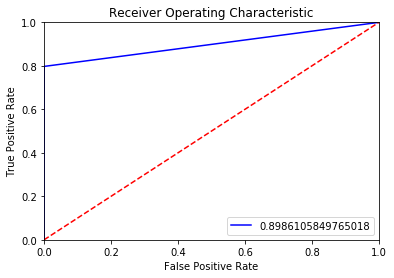

In [55]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [56]:
#TUNNING LOGISTIC
#STORE THE PREDICTED PROBABILITIES
y_pred_prob=lg.predict_proba(X_test)
print(y_pred_prob)

[[9.98623087e-01 1.37691311e-03]
 [9.88032884e-01 1.19671155e-02]
 [9.91036250e-01 8.96375027e-03]
 ...
 [9.95609259e-01 4.39074092e-03]
 [9.98834496e-01 1.16550417e-03]
 [9.99489289e-01 5.10711299e-04]]


In [57]:
for a in np.arange(0.3,0.9,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
            cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 149  , type 2 error : 63  , type 1 error: 86
Errors at threshold  0.31 : 147  , type 2 error : 63  , type 1 error: 84
Errors at threshold  0.32 : 144  , type 2 error : 63  , type 1 error: 81
Errors at threshold  0.33 : 141  , type 2 error : 63  , type 1 error: 78
Errors at threshold  0.34 : 139  , type 2 error : 63  , type 1 error: 76
Errors at threshold  0.35000000000000003 : 137  , type 2 error : 63  , type 1 error: 74
Errors at threshold  0.36000000000000004 : 132  , type 2 error : 63  , type 1 error: 69
Errors at threshold  0.37000000000000005 : 129  , type 2 error : 63  , type 1 error: 66
Errors at threshold  0.38000000000000006 : 127  , type 2 error : 63  , type 1 error: 64
Errors at threshold  0.39000000000000007 : 126  , type 2 error : 63  , type 1 error: 63
Errors at threshold  0.4000000000000001 : 125  , type 2 error : 63  , type 1 error: 62
Errors at threshold  0.4100000000000001 : 123  , type 2 error : 63  , type 1 error: 60
Errors at threshold  0

In [58]:
'''HERE WE CAN SEE THAT 0.63 IS THE BEST THRESHOLD'''
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.63:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

In [59]:
#EVALUATION METRICS AFTER TUNNING
cfm=confusion_matrix(Y_test, y_pred_class)
print(cfm)

print('Classification report: ')

print(classification_report(Y_test,y_pred_class))

acc= accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ", acc)

[[256636     44]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.80      0.82       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995836430069536


In [60]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8986105849765018


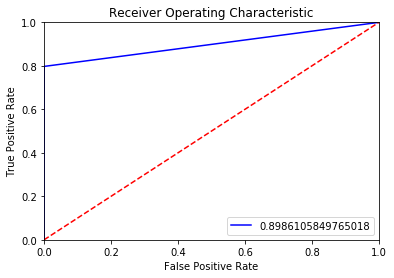

In [61]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# DECISION TREE

In [62]:
#MODEL BUILDING USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model_DT=DecisionTreeClassifier(criterion="gini",random_state=10)

##Train the model
model_DT.fit(X_train,Y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [63]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[256627     53]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.82      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

0.9995486223252954


In [64]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8986105849765018


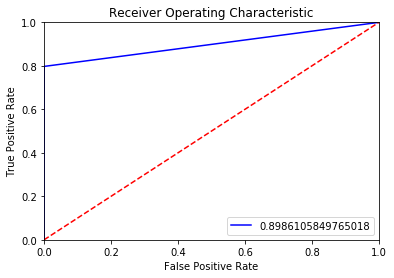

In [65]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [66]:
#MODEL BUILDING USING PRUNED DECISION TREE AFTER VARIOUS NUMBER OF ITERATIONS
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",random_state=10,max_depth=15,min_samples_leaf=120)
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)

In [67]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[256676      4]
 [    63    248]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.98      0.80      0.88       311

    accuracy                           1.00    256991
   macro avg       0.99      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991

0.9997392904809896


In [68]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8987060345635363


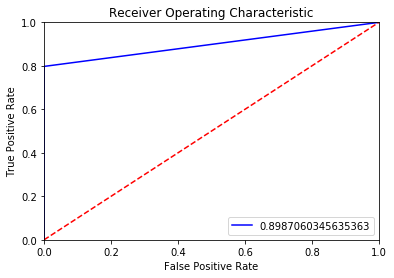

In [69]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# BAGGING

In [70]:
#MODEL BUILDING USING EXTRA TREE CLASSIFIER
from sklearn.ensemble import ExtraTreesClassifier
 
model=ExtraTreesClassifier(100,random_state=10,max_depth=15, min_samples_leaf=120)
#fit the model on the data and predict the values
model=model.fit(X_train,Y_train)
 
Y_pred=model.predict(X_test)
 
 

In [71]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[256671      9]
 [   108    203]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.96      0.65      0.78       311

    accuracy                           1.00    256991
   macro avg       0.98      0.83      0.89    256991
weighted avg       1.00      1.00      1.00    256991

0.9995447311384446


In [72]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8263490279287283


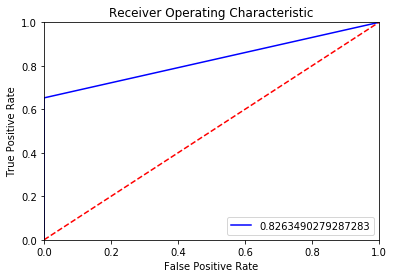

In [73]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [ ]:
# MODEL BUILDING USING RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier
 
model_RandomForest=RandomForestClassifier(n_estimators=101,random_state=10)
 
#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
 
Y_pred=model_RandomForest.predict(X_test)

In [ ]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

In [ ]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

In [ ]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# BOOSTING

In [66]:
#MODEL BUILDING USING GRADIENT BOOST
from sklearn.ensemble import GradientBoostingClassifier
 
model_GradientBoosting=GradientBoostingClassifier(n_estimators=150, #default n_estimators=100
                                                  random_state=10,)
 
#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)
 
Y_pred=model_GradientBoosting.predict(X_test)

In [67]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[116523 140157]
 [     3    308]]
              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.72      0.31    256991
weighted avg       1.00      0.45      0.62    256991

0.4546112509776607


In [68]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.7221579147932515


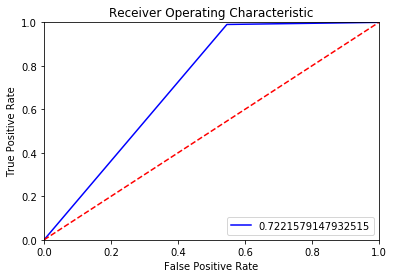

In [69]:
#PLOTTING OF THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [70]:
#MODEL BUILDING USING ADA BOOST
from sklearn.ensemble import AdaBoostClassifier
 
model_AdaBoost=AdaBoostClassifier()
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)
 

 



In [71]:
#EVALUATION METRICS
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test,Y_pred))
print(accuracy_score(Y_test,Y_pred))

[[246847   9833]
 [    61    250]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    256680
           1       0.02      0.80      0.05       311

    accuracy                           0.96    256991
   macro avg       0.51      0.88      0.51    256991
weighted avg       1.00      0.96      0.98    256991

0.9615005972971816


In [72]:
#ROC CURVE
from sklearn import metrics 
fpr, tpr, z = metrics.roc_curve(Y_test, Y_pred)
auc = metrics.auc(fpr, tpr)
print(auc)

0.8827750606683312


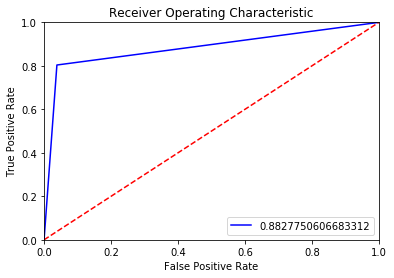

In [73]:
#PLOTTING THE ROC CURVE
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()